In [45]:
import mne
import glob
import os
import numpy as np
mne.set_log_level("error")


%matplotlib qt

In [7]:
#glob.glob('../../eeg_jhana/notebooks/hand_cleaning/control_resting_state/*')

In [61]:
paths = glob.glob('../../eeg_jhana/notebooks/hand_cleaning/resting_state/*')
paths.sort()
#paths = paths[:5]

for path in paths: 
    raw = mne.io.read_raw(path, preload=True)

    # Assuming `raw` is your MNE Raw object with annotations
    bad_segments = []
    for annot in raw.annotations:
        if annot['description'].lower() == 'bad_':
            bad_segments.append((annot['onset']-raw.first_time, annot['onset'] + annot['duration']))

    # Get all good segments
    good_segments = []
    start_time = 0  # Start from the beginning

    for bad_start, bad_end in bad_segments:
        if bad_start - start_time >= 30:  # Keep only segments longer than 10s
            good_segments.append((start_time, bad_start))
        start_time = bad_end  # Move start time to after the bad segment

    # Handle last segment if it exists
    if start_time < raw.times[-1]:  
        good_segments.append((start_time, raw.times[-1]))

    # Extract and concatenate the valid good segments
    good_raws = [raw.copy().crop(tmin, tmax) for tmin, tmax in good_segments]
    raw_cleaned = mne.concatenate_raws(good_raws)
    
    print (f'epoch is {np.round(len(raw_cleaned)/256/60, 2)} minutes')

    raw_cleaned.save('input/continuous/' + os.path.basename(path), overwrite=True)



epoch is 15.76 minutes
epoch is 21.8 minutes
epoch is 18.38 minutes
epoch is 15.87 minutes
epoch is 18.57 minutes
epoch is 20.58 minutes
epoch is 19.35 minutes
epoch is 13.8 minutes
epoch is 19.41 minutes
epoch is 16.53 minutes
epoch is 15.06 minutes
epoch is 22.94 minutes
epoch is 18.86 minutes
epoch is 23.63 minutes
epoch is 23.34 minutes
epoch is 21.1 minutes
epoch is 21.31 minutes


IndexError: list index out of range

In [39]:
'input/continuous/' + os.path.basename(path)

'input/continuous/sub9-day4-mindfulness-raw.fif'

In [48]:
saved_paths = glob.glob('input/continuous/*') 

In [49]:
raw = mne.io.read_raw(saved_paths[0])

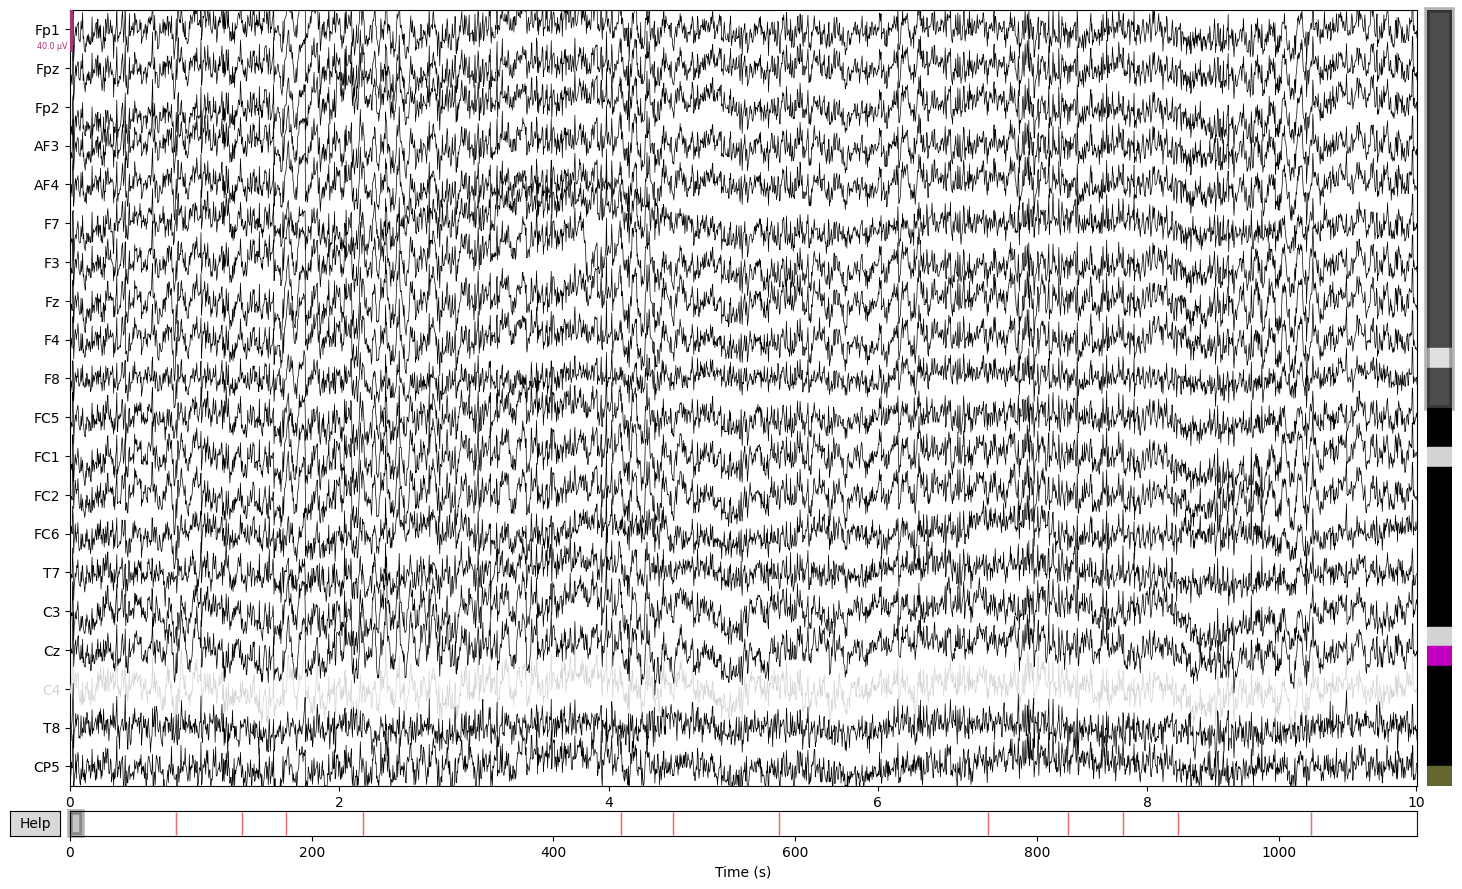

In [50]:
raw.plot()

In [52]:
data = raw.get_data()

In [53]:
data.shape

(39, 285285)

In [54]:
import matplotlib.pyplot as plt

In [58]:
plt.plot(data[3,:])

In [59]:
plt.show()

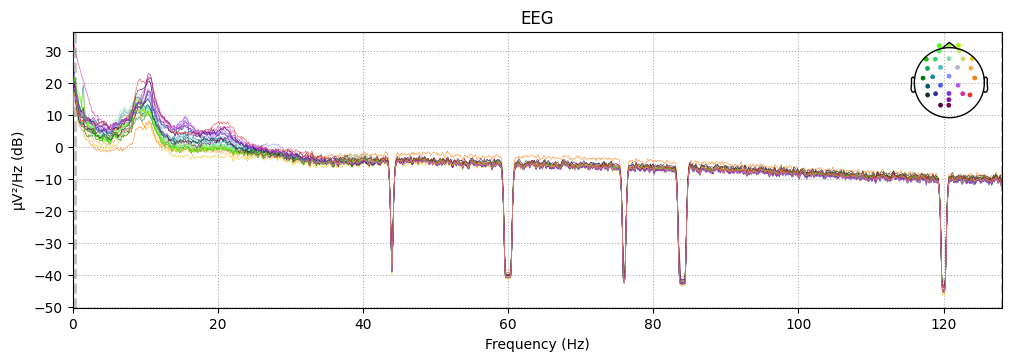

In [60]:
raw.plot_psd()